In [36]:
import pandas as pd
air = pd.read_csv('대한항공.csv',engine='python')
weather = pd.read_csv('날씨종합.csv',engine='python')

In [61]:
final = pd.read_csv('스케일안한최종셋air.csv',engine='python')
del final['Unnamed: 0']
final.to_csv('스케일안한최종셋air.csv',mode='w')

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

final.iloc[:,1:] = scaler.fit_transform(final.iloc[:,1:])
final.to_csv('스케일적용안한최종셋air.csv',mode='w')
final.head()


,date,avertemp,dayrain,averwind,averhumid,totalsun,avercloud,dust,presentusa,usainter,...,hello27,hello28,hello29,hello30,hello31,hello32,smog,beforeclose,line,close
0,2009-01-02,-0.481641,-1.0,-0.573333,-0.238462,-0.403497,-1.00,-0.860833,-0.379886,-1.0,...,-0.235955,0.216327,0.598039,-1.0,-0.846154,-1.0,-1.0,-0.513957,-0.498405,-0.500821
1,2009-01-05,-0.429806,-1.0,-0.413333,-0.197436,-0.574983,-0.68,-0.822242,-0.307672,-1.0,...,-0.295880,0.200000,0.637255,-1.0,-0.846154,-1.0,-1.0,-0.500821,-0.497062,-0.476190
2,2009-01-06,-0.447084,-1.0,-0.546667,-0.276923,-0.583726,-0.28,-0.708295,-0.263946,-1.0,...,-0.273408,0.248980,0.617647,-1.0,-0.830769,-1.0,-1.0,-0.476190,-0.496055,-0.471264
3,2009-01-07,-0.382289,-1.0,-0.520000,-0.482051,-0.447882,-0.90,-0.747493,-0.346098,-1.0,...,-0.318352,0.167347,0.588235,-1.0,-0.907692,-1.0,-1.0,-0.471264,-0.492362,-0.471264
4,2009-01-08,-0.399568,-1.0,-0.520000,-0.482051,-0.524546,-0.40,-0.780614,-0.381874,-1.0,...,-0.295880,0.118367,0.529412,-1.0,-0.800000,-1.0,-1.0,-0.471264,-0.489676,-0.500821


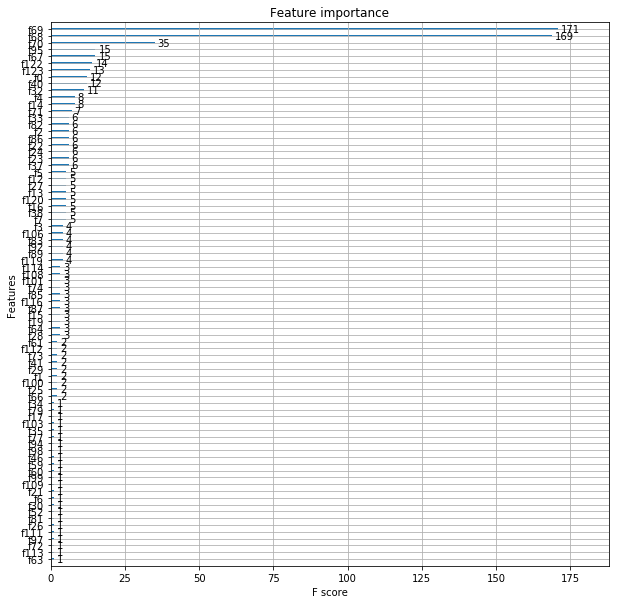

In [213]:
import numpy as np
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_importance
from matplotlib import pyplot
import matplotlib
# load data
dataset = loadtxt('스케일적용한최종셋air넘파이용.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:124]
y = dataset[:,124]
# fit model no training data
matplotlib.rc('figure',figsize=(10,10))
model = XGBRegressor()
clf=model.fit(X,y)
plot_importance(clf)
pyplot.show()

In [188]:
b=pd.DataFrame(clf.feature_importances_)
b['featurename']=final.columns.values
b['import']=b.iloc[:,0]
data = b.sort_values(["import"], ascending=[False])
data = data.reset_index(drop=True)
data
data1=data[data['import']>0]
data1

,0,featurename,import
0,0.252585,low,0.252585
1,0.249631,high,0.249631
2,0.051699,volume,0.051699
3,0.022157,hello5,0.022157
4,0.022157,open,0.022157
5,0.020679,beforeclose,0.020679
6,0.019202,line,0.019202
7,0.017725,natural,0.017725
8,0.017725,avertemp,0.017725
9,0.016248,enhwa,0.016248


In [198]:
feature30=data1.iloc[:30,:]
feature40=data1.iloc[:40,:]
feature50=data1.iloc[:50,:]

In [209]:
"""print(feature30['featurename'])
print(feature40['featurename'])
print(feature50['featurename'])"""
#a=np.array(feature30['featurename'].values)
#b=np.array(feature40['featurename'].values)
c=np.array(feature50['featurename'].values)
c

array(['low', 'high', 'volume', 'hello5', 'open', 'beforeclose', 'line',
       'natural', 'avertemp', 'enhwa', 'sliver', 'totalsun', 'mintemp',
       'windtotal', 'pound', 'HangSeng', 'FTSE100', 'Nikkei225',
       'maxatthatwindtime', 'BRENT', 'averwind', 'hello32', 'avercloud',
       'bronze', 'DUBAI', 'gold', 'gas', 'NasdaqComposite', 'presentusa',
       'hello31', 'hello2', 'averhumid', 'maxwind', 'minhumidtime',
       'hello18', 'maxtemptime', 'hello26', 'maxwindtime', 'g',
       'avertear', 'hello12', 'hello20', 'Dow30', 'alu', 'chinagrowth',
       'hello28', 'j', 'hello24', 'interprice', 'hello10'], dtype=object)

In [215]:
final

,avertemp,dayrain,averwind,averhumid,totalsun,avercloud,dust,presentusa,usainter,ukinter,...,hello26,hello27,hello28,hello29,hello30,hello31,hello32,smog,beforeclose,line
0,-0.481641,-1.000000,-0.573333,-2.384615e-01,-0.403497,-1.00,-0.860833,-0.379886,-1.00000,1.000000,...,-0.512915,-0.235955,0.216327,0.598039,-1.000000,-0.846154,-1.000000,-1.000000,-0.513957,-0.498405
1,-0.429806,-1.000000,-0.413333,-1.974359e-01,-0.574983,-0.68,-0.822242,-0.307672,-1.00000,1.000000,...,-0.542435,-0.295880,0.200000,0.637255,-1.000000,-0.846154,-1.000000,-1.000000,-0.500821,-0.497062
2,-0.447084,-1.000000,-0.546667,-2.769231e-01,-0.583726,-0.28,-0.708295,-0.263946,-1.00000,1.000000,...,-0.542435,-0.273408,0.248980,0.617647,-1.000000,-0.830769,-1.000000,-1.000000,-0.476190,-0.496055
3,-0.382289,-1.000000,-0.520000,-4.820513e-01,-0.447882,-0.90,-0.747493,-0.346098,-1.00000,1.000000,...,-0.564576,-0.318352,0.167347,0.588235,-1.000000,-0.907692,-1.000000,-1.000000,-0.471264,-0.492362
4,-0.399568,-1.000000,-0.520000,-4.820513e-01,-0.524546,-0.40,-0.780614,-0.381874,-1.00000,0.428571,...,-0.601476,-0.295880,0.118367,0.529412,-1.000000,-0.800000,-1.000000,-1.000000,-0.471264,-0.489676
5,-0.511879,-1.000000,-0.200000,-4.564103e-01,-0.536651,-0.90,-0.801580,-0.341460,-1.00000,0.428571,...,-0.579336,-0.318352,0.200000,0.617647,-1.000000,-0.738462,-1.000000,-1.000000,-0.500821,-0.492362
6,-0.697624,-1.000000,0.093333,-3.410256e-01,-0.374580,-0.90,-0.839259,-0.291109,-1.00000,0.428571,...,-0.586716,-0.318352,0.151020,0.607843,-1.000000,-0.800000,-1.000000,-1.000000,-0.513957,-0.510156
7,-0.598272,-1.000000,-0.440000,-3.974359e-01,-0.313383,-0.72,-0.870860,-0.225520,-1.00000,0.428571,...,-0.623616,-0.408240,0.175510,0.637255,-1.000000,-0.769231,-1.000000,-1.000000,-0.563218,-0.526272
8,-0.645788,-1.000000,-0.066667,-5.435897e-01,-0.305985,-0.92,-0.810392,-0.210282,-1.00000,0.428571,...,-0.616236,-0.393258,0.077551,0.588235,-1.000000,-0.784615,-1.000000,-1.000000,-0.550082,-0.536344
9,-0.632829,-1.000000,-0.440000,-6.769231e-01,-0.299933,-0.50,-0.882710,-0.187094,-1.00000,0.428571,...,-0.638376,-0.430712,0.085714,0.647059,-1.000000,-0.830769,-1.000000,-1.000000,-0.520525,-0.559174


In [219]:
final = pd.read_csv('스케일안한최종셋air.csv',engine='python')
del final['Unnamed: 0']
final.head()

,date,avertemp,dayrain,averwind,averhumid,totalsun,avercloud,dust,presentusa,usainter,...,hello27,hello28,hello29,hello30,hello31,hello32,smog,beforeclose,line,close
0,2009-01-02,-2.8,0.0,1.6,51.5,8.87,0.0,45.8,82.46,0.13,...,10.2,14.9,16.3,0.0,1.0,0.0,0.0,38000,38650,38400
1,2009-01-05,-1.6,0.0,2.2,53.1,6.32,1.6,58.5,83.55,0.13,...,9.4,14.7,16.7,0.0,1.0,0.0,0.0,38400,38690,39150
2,2009-01-06,-2.0,0.0,1.7,50.0,6.19,3.6,96.0,84.21,0.13,...,9.7,15.3,16.5,0.0,1.1,0.0,0.0,39150,38720,39300
3,2009-01-07,-0.5,0.0,1.8,42.0,8.21,0.5,83.1,82.97,0.13,...,9.1,14.3,16.2,0.0,0.6,0.0,0.0,39300,38830,39300
4,2009-01-08,-0.9,0.0,1.8,42.0,7.07,3.0,72.2,82.43,0.13,...,9.4,13.7,15.6,0.0,1.3,0.0,0.0,39300,38910,38400


In [220]:


final30=final[['low', 'high', 'volume', 'hello5', 'open', 'beforeclose', 'line',
       'natural', 'avertemp', 'enhwa', 'sliver', 'totalsun', 'mintemp',
       'windtotal', 'pound', 'HangSeng', 'FTSE100', 'Nikkei225',
       'maxatthatwindtime', 'BRENT', 'averwind', 'hello32', 'avercloud',
       'bronze', 'DUBAI', 'gold', 'gas', 'NasdaqComposite', 'presentusa',
       'hello31','close']]
final40=final[['low', 'high', 'volume', 'hello5', 'open', 'beforeclose', 'line',
       'natural', 'avertemp', 'enhwa', 'sliver', 'totalsun', 'mintemp',
       'windtotal', 'pound', 'HangSeng', 'FTSE100', 'Nikkei225',
       'maxatthatwindtime', 'BRENT', 'averwind', 'hello32', 'avercloud',
       'bronze', 'DUBAI', 'gold', 'gas', 'NasdaqComposite', 'presentusa',
       'hello31', 'hello2', 'averhumid', 'maxwind', 'minhumidtime',
       'hello18', 'maxtemptime', 'hello26', 'maxwindtime', 'g',
       'avertear','close']]
final50=final[['low', 'high', 'volume', 'hello5', 'open', 'beforeclose', 'line',
       'natural', 'avertemp', 'enhwa', 'sliver', 'totalsun', 'mintemp',
       'windtotal', 'pound', 'HangSeng', 'FTSE100', 'Nikkei225',
       'maxatthatwindtime', 'BRENT', 'averwind', 'hello32', 'avercloud',
       'bronze', 'DUBAI', 'gold', 'gas', 'NasdaqComposite', 'presentusa',
       'hello31', 'hello2', 'averhumid', 'maxwind', 'minhumidtime',
       'hello18', 'maxtemptime', 'hello26', 'maxwindtime', 'g',
       'avertear', 'hello12', 'hello20', 'Dow30', 'alu', 'chinagrowth',
       'hello28', 'j', 'hello24', 'interprice', 'hello10','close']]
#final30.to_csv('30개변수대한항공.csv',mode='w')
final40.to_csv('40개변수대한항공.csv',mode='w')
#final50.to_csv('50개변수대한항공.csv',mode='w')

In [156]:
dataset = loadtxt('스케일적용한최종셋air넘파이용.csv', delimiter=",")
 #총 125개
# 종가를 빼면 124개
dataset[:,125]

IndexError: index 125 is out of bounds for axis 1 with size 125

In [216]:
final = pd.read_csv('스케일적용한최종셋air.csv',engine='python')
del final['date']
final.head()

,avertemp,dayrain,averwind,averhumid,totalsun,avercloud,dust,presentusa,usainter,ukinter,...,hello27,hello28,hello29,hello30,hello31,hello32,smog,beforeclose,line,close
0,-0.481641,-1.0,-0.573333,-0.238462,-0.403497,-1.00,-0.860833,-0.379886,-1.0,1.000000,...,-0.235955,0.216327,0.598039,-1.0,-0.846154,-1.0,-1.0,-0.513957,-0.498405,-0.500821
1,-0.429806,-1.0,-0.413333,-0.197436,-0.574983,-0.68,-0.822242,-0.307672,-1.0,1.000000,...,-0.295880,0.200000,0.637255,-1.0,-0.846154,-1.0,-1.0,-0.500821,-0.497062,-0.476190
2,-0.447084,-1.0,-0.546667,-0.276923,-0.583726,-0.28,-0.708295,-0.263946,-1.0,1.000000,...,-0.273408,0.248980,0.617647,-1.0,-0.830769,-1.0,-1.0,-0.476190,-0.496055,-0.471264
3,-0.382289,-1.0,-0.520000,-0.482051,-0.447882,-0.90,-0.747493,-0.346098,-1.0,1.000000,...,-0.318352,0.167347,0.588235,-1.0,-0.907692,-1.0,-1.0,-0.471264,-0.492362,-0.471264
4,-0.399568,-1.0,-0.520000,-0.482051,-0.524546,-0.40,-0.780614,-0.381874,-1.0,0.428571,...,-0.295880,0.118367,0.529412,-1.0,-0.800000,-1.0,-1.0,-0.471264,-0.489676,-0.500821


In [80]:
len(final.columns.values)

124

In [102]:
final.head()

,avertemp,dayrain,averwind,averhumid,totalsun,avercloud,dust,presentusa,usainter,ukinter,...,hello26,hello27,hello28,hello29,hello30,hello31,hello32,smog,beforeclose,line
0,-0.481641,-1.0,-0.573333,-0.238462,-0.403497,-1.00,-0.860833,-0.379886,-1.0,1.000000,...,-0.512915,-0.235955,0.216327,0.598039,-1.0,-0.846154,-1.0,-1.0,-0.513957,-0.498405
1,-0.429806,-1.0,-0.413333,-0.197436,-0.574983,-0.68,-0.822242,-0.307672,-1.0,1.000000,...,-0.542435,-0.295880,0.200000,0.637255,-1.0,-0.846154,-1.0,-1.0,-0.500821,-0.497062
2,-0.447084,-1.0,-0.546667,-0.276923,-0.583726,-0.28,-0.708295,-0.263946,-1.0,1.000000,...,-0.542435,-0.273408,0.248980,0.617647,-1.0,-0.830769,-1.0,-1.0,-0.476190,-0.496055
3,-0.382289,-1.0,-0.520000,-0.482051,-0.447882,-0.90,-0.747493,-0.346098,-1.0,1.000000,...,-0.564576,-0.318352,0.167347,0.588235,-1.0,-0.907692,-1.0,-1.0,-0.471264,-0.492362
4,-0.399568,-1.0,-0.520000,-0.482051,-0.524546,-0.40,-0.780614,-0.381874,-1.0,0.428571,...,-0.601476,-0.295880,0.118367,0.529412,-1.0,-0.800000,-1.0,-1.0,-0.471264,-0.489676


In [83]:
dataset.shape

(2344, 125)

In [175]:
dataset[2,0:8]

array([-0.44708423, -1.        , -0.54666667, -0.27692308, -0.58372562,
       -0.28      , -0.70829535, -0.26394594])

In [127]:
dataset = loadtxt('스케일적용한최종셋air넘파이용.csv', delimiter=",")
dataset.shape

(2344, 125)

In [122]:
dataset[:,124] = 125개(close포함) - 컬럼 124개

array([-0.50082102, -0.47619048, -0.47126437, ..., -0.79474548,
       -0.78489327, -0.83908046])

,avertemp,dayrain,averwind,averhumid,totalsun,avercloud,dust,presentusa,usainter,ukinter,...,hello26,hello27,hello28,hello29,hello30,hello31,hello32,smog,beforeclose,line
0,-0.481641,-1.0,-0.573333,-0.238462,-0.403497,-1.00,-0.860833,-0.379886,-1.0,1.000000,...,-0.512915,-0.235955,0.216327,0.598039,-1.0,-0.846154,-1.0,-1.0,-0.513957,-0.498405
1,-0.429806,-1.0,-0.413333,-0.197436,-0.574983,-0.68,-0.822242,-0.307672,-1.0,1.000000,...,-0.542435,-0.295880,0.200000,0.637255,-1.0,-0.846154,-1.0,-1.0,-0.500821,-0.497062
2,-0.447084,-1.0,-0.546667,-0.276923,-0.583726,-0.28,-0.708295,-0.263946,-1.0,1.000000,...,-0.542435,-0.273408,0.248980,0.617647,-1.0,-0.830769,-1.0,-1.0,-0.476190,-0.496055
3,-0.382289,-1.0,-0.520000,-0.482051,-0.447882,-0.90,-0.747493,-0.346098,-1.0,1.000000,...,-0.564576,-0.318352,0.167347,0.588235,-1.0,-0.907692,-1.0,-1.0,-0.471264,-0.492362
4,-0.399568,-1.0,-0.520000,-0.482051,-0.524546,-0.40,-0.780614,-0.381874,-1.0,0.428571,...,-0.601476,-0.295880,0.118367,0.529412,-1.0,-0.800000,-1.0,-1.0,-0.471264,-0.489676


,avertemp,dayrain,averwind,averhumid,totalsun,avercloud,dust,presentusa,usainter,ukinter,...,hello26,hello27,hello28,hello29,hello30,hello31,hello32,smog,beforeclose,line
0,-2.8,0.0,1.6,51.5,8.87,0.0,45.8,82.46,0.13,2.0,...,6.6,10.2,14.9,16.3,0.0,1.0,0.0,0.0,38000,38650
1,-1.6,0.0,2.2,53.1,6.32,1.6,58.5,83.55,0.13,2.0,...,6.2,9.4,14.7,16.7,0.0,1.0,0.0,0.0,38400,38690
2,-2.0,0.0,1.7,50.0,6.19,3.6,96.0,84.21,0.13,2.0,...,6.2,9.7,15.3,16.5,0.0,1.1,0.0,0.0,39150,38720
3,-0.5,0.0,1.8,42.0,8.21,0.5,83.1,82.97,0.13,2.0,...,5.9,9.1,14.3,16.2,0.0,0.6,0.0,0.0,39300,38830
4,-0.9,0.0,1.8,42.0,7.07,3.0,72.2,82.43,0.13,1.5,...,5.4,9.4,13.7,15.6,0.0,1.3,0.0,0.0,39300,38910


array(['avertemp', 'dayrain', 'averwind', 'averhumid', 'totalsun',
       'avercloud', 'dust', 'presentusa', 'usainter', 'ukinter',
       'japeninter', 'chinainter', 'gas', 'gold', 'sliver', 'alu',
       'bronze', 'usagrowth', 'japengrowth', 'chinagrowth', 'ukgrowth',
       'koreagrowth', 'Nikkei225', 'FTSE100', 'HangSeng',
       'ShanghaiComposite', 'SP500Index', 'NasdaqComposite', 'Dow30',
       'NYSE', 'Philadelphia', 'dollar', 'enhwa', 'pound', 'Hdollar',
       'wian', 'WTI', 'BRENT', 'DUBAI', 'fire', 'natural', 'interprice',
       'product', 'export', 'import', 'home', 'invest', 'bank', 'lean',
       'kind', 'intercar', 'productaver', 'consume', 'eximrate', 'gdp',
       'totalinve', 'gdpinve', 'deple', 'a', 'b', 'c', 'd', 'e', 'f', 'g',
       'h', 'j', 'open', 'high', 'low', 'volume', 'mintemp',
       'mintemptime', 'maxtemp', 'maxtemptime', 'raincontintime',
       'tenrain', 'tenraintime', 'hourmaxrain', 'hourmaxraintime',
       'maxatthatwind', 'maxatthatwindwhere',

124